In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_excel('Crime_Data.xlsx')

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,2007-08-25 09:22:18,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,2015-08-17 15:03:40,NaN,NaN,NaN
1,25953,JE240540,2021-05-24 15:06:00,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,2023-11-18 15:39:49,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,2021-06-26 09:24:00,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,2023-11-18 15:39:49,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,2023-11-09 07:30:00,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023,2023-11-18 15:39:49,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,2023-12-09 15:41:24,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [4]:
def clean_data(df):
    df.dropna(subset=['Primary Type', 'Location Description', 'Date'], inplace=True)
    
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[df['Date'].notna()]  

    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Hour'] = df['Date'].dt.hour

    text_cols = ['Primary Type', 'Description', 'Location Description']
    for col in text_cols:
        df[col] = df[col].str.strip()
    
    severe_crimes = ['HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'AGGRAVATED ASSAULT']
    df['Severity'] = df['Primary Type'].apply(lambda x: 'Severe' if x in severe_crimes else 'Non-Severe')
    
    df.drop_duplicates(inplace=True)

    df['Arrest'] = df['Arrest'].astype(bool)
    df['Domestic'] = df['Domestic'].astype(bool)
    print("Data cleaned. Shape:", df.shape)
    return df

In [5]:
df_cleaned = clean_data(df)

Data cleaned. Shape: (548326, 26)


In [6]:
path = r"C:/Users/admin/Desktop/GUVI Projects/Chicago Crime Project/Cleaned Crime Data.csv"
df_cleaned.to_csv(path, index=False)

Exploratory Data Analysis

In [8]:
# 1. Crime Type Distribution
crime_type_dist = df_cleaned['Primary Type'].value_counts()
print("Crime Type Distribution:")
print(crime_type_dist.head(10))

Crime Type Distribution:
Primary Type
THEFT                  112764
BATTERY                100995
CRIMINAL DAMAGE         60214
ASSAULT                 40046
NARCOTICS               39571
MOTOR VEHICLE THEFT     37214
OTHER OFFENSE           33883
BURGLARY                23372
DECEPTIVE PRACTICE      22607
ROBBERY                 21066
Name: count, dtype: int64


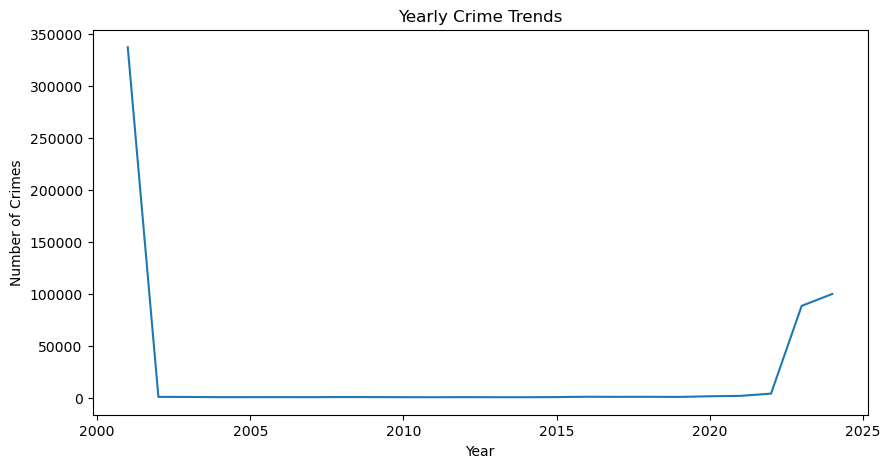

In [9]:
# 2. Yearly Crime Trends
yearly_trends = df_cleaned.groupby('Year').size()
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values)
plt.title('Yearly Crime Trends')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.savefig('Yearly_Crime_Trends.png')
plt.show()

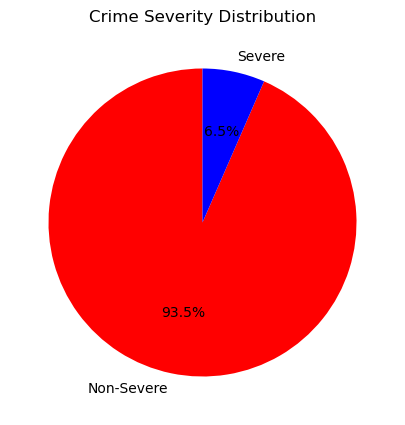

In [10]:
# 3. Crime Severity Distribution
plt.figure(figsize=(7, 5))
df_cleaned['Severity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.title('Crime Severity Distribution')
plt.ylabel('')
plt.savefig('Crime_Severity_Distribution.png')
plt.show()

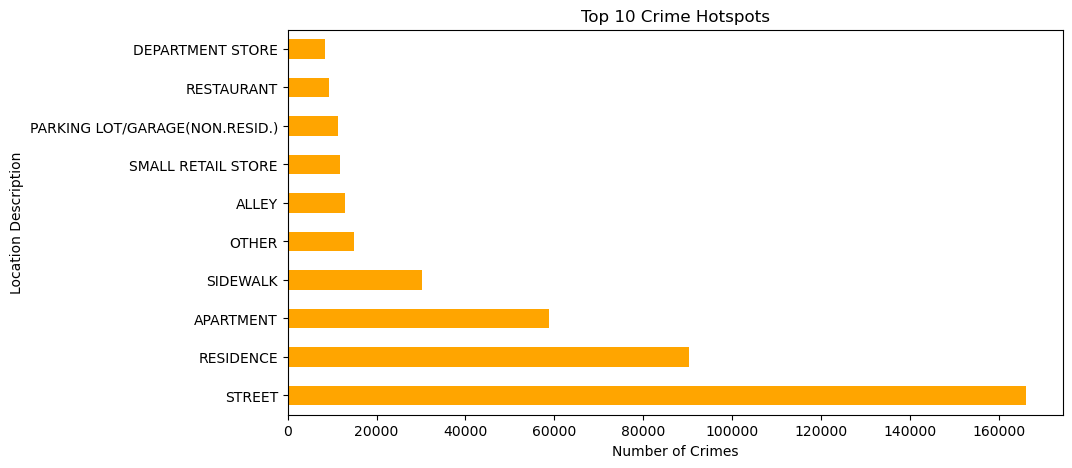

In [11]:
# 4. Crime Hotspots
hotspots = df_cleaned['Location Description'].value_counts().head(10)
plt.figure(figsize=(10, 5))
hotspots.plot(kind='barh', color='orange')
plt.title('Top 10 Crime Hotspots')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.savefig('Crime_Hotspots.png')
plt.show()

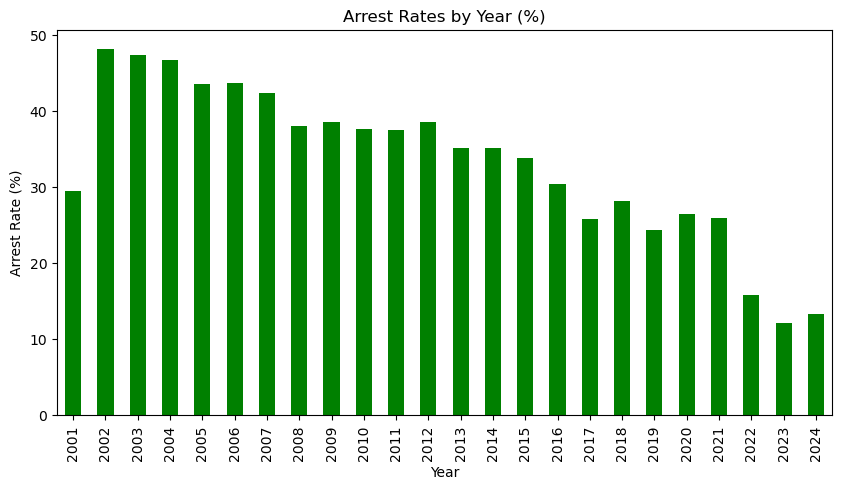

In [12]:
# 5. Arrest Rates by Year
arrest_rates = df_cleaned.groupby('Year')['Arrest'].mean() * 100
plt.figure(figsize=(10, 5))
arrest_rates.plot(kind='bar', color='green')
plt.title('Arrest Rates by Year (%)')
plt.xlabel('Year')
plt.ylabel('Arrest Rate (%)')
plt.savefig('Arrest_Rates_Yearly.png')
plt.show()

In [13]:
output_dir = 'Outputs/Visualizations'
os.makedirs(output_dir, exist_ok=True)
for file in ['Yearly_Crime_Trends.png', 'Crime_Severity_Distribution.png', 'Crime_Hotspots.png', 'Arrest_Rates_Yearly.png']:
    os.rename(file, os.path.join(output_dir, file))

In [14]:
report_path = 'Outputs/reports/summary_report.txt'
os.makedirs(os.path.dirname(report_path), exist_ok=True)
with open(report_path, 'w') as report:
    report.write("Chicago Crime Analysis Summary Report\n")
    report.write("="*40 + "\n\n")
    report.write("1. Top 10 Crime Types:\n")
    report.write(crime_type_dist.head(10).to_string() + "\n\n")
    report.write("2. Yearly Crime Trends:\n")
    report.write(yearly_trends.to_string() + "\n\n")
    report.write("3. Top 10 Crime Hotspots:\n")
    report.write(hotspots.to_string() + "\n\n")
    report.write("4. Arrest Rates by Year (%):\n")
    report.write(arrest_rates.to_string() + "\n")

print(f"Summary report saved at: {report_path}")


Summary report saved at: outputs/reports/summary_report.txt
